In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from google.colab import drive
drive.mount('/content/drive')

path_to_test_data= '/content/drive/MyDrive/Week 1 Challenge/test.csv'
path_to_train_data= '/content/drive/MyDrive/Week 1 Challenge/train.csv'

train_data= pd.read_csv(path_to_train_data)
test_data= pd.read_csv(path_to_test_data)

data= pd.merge(train_data, test_data, how= 'outer')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/merge.py:1204: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
row= data.shape[0]
column= data.shape[1]
print('data has {} rows and {} column'.format(row, column))

data has 614 rows and 13 column


In [60]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing 3+ with 3 to have a more managable data:

In [61]:
data.Dependents=data.Dependents.replace({"3+": "3"})

Replacing missing data:

In [62]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace= True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace= True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace= True)
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0], inplace= True)

In [63]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Encoding categorical data and combining with numerical:

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_data=data[['Self_Employed','Gender','Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=data[['CoapplicantIncome','ApplicantIncome', 'LoanAmount','Loan_Amount_Term']]
cat_data.head()

,Self_Employed,Gender,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,No,Male,1.0,0,Graduate,No,Urban,Y
1,No,Male,1.0,1,Graduate,Yes,Rural,N
2,Yes,Male,1.0,0,Graduate,Yes,Urban,Y
3,No,Male,1.0,0,Not Graduate,Yes,Urban,Y
4,No,Male,1.0,0,Graduate,No,Urban,Y


In [66]:
for i in cat_data:
    cat_data[i] = encoder.fit_transform(cat_data[i])
cat_data.head()

<ipython-input-66-4da04afc36c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = encoder.fit_transform(cat_data[i])


,Self_Employed,Gender,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,0,1,1,0,0,0,2,1
1,0,1,1,1,0,1,0,0
2,1,1,1,0,0,1,2,1
3,0,1,1,0,1,1,2,1
4,0,1,1,0,0,0,2,1


In [67]:
data = pd.concat([cat_data, num_data], axis=1)
data.head()

,Self_Employed,Gender,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term
0,0,1,1,0,0,0,2,1,0.0,5849,120.0,360.0
1,0,1,1,1,0,1,0,0,1508.0,4583,128.0,360.0
2,1,1,1,0,0,1,2,1,0.0,3000,66.0,360.0
3,0,1,1,0,1,1,2,1,2358.0,2583,120.0,360.0
4,0,1,1,0,0,0,2,1,0.0,6000,141.0,360.0


Normalization:

In [68]:
data_max = data.max() # max number for each column
data = data.divide(data_max) # normalize the data
data.describe()

,Self_Employed,Gender,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome,ApplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.133550,0.817590,0.855049,0.248100,0.218241,0.653094,0.518730,0.687296,0.038910,0.066709,0.207808,0.713355
std,0.340446,0.386497,0.352339,0.336541,0.413389,0.476373,0.393741,0.463973,0.070229,0.075420,0.120259,0.134226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001852,0.012857,0.025000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035525,0.143214,0.750000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.028524,0.047068,0.178571,0.750000
75%,0.000000,1.000000,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000,0.055134,0.071543,0.235357,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After normaliztion max number is 1 and min number is 0

Training and Testing Process:

In [69]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

inputs= ['Self_Employed','Gender','Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome','ApplicantIncome', 'LoanAmount','Loan_Amount_Term']
x = data[inputs]
y = data['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

In [70]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [71]:
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8702702702702703

Accuracy score is 87%

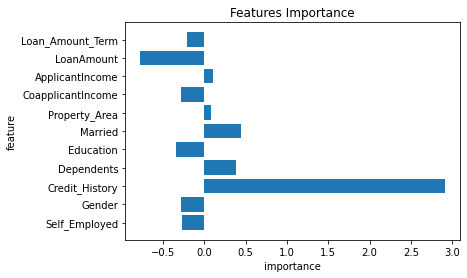

In [72]:
columns_names = x_train.columns.values
features_importance = model.coef_
f=features_importance.flatten()
plt.barh(columns_names, f)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

This graphs shows which feature comtributes more to the Loan Status. 